In [14]:
import lightgbm as lgbm

import sklearn as sk
import pandas as pd
import base_functions as funcs
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import imblearn
import sklearn
from sklearn.ensemble  import RandomForestClassifier
import lightgbm as lgbm

data, labels = funcs.ReadCSV('./datasets/creditcard.csv', mark='Class')
data = data.drop(columns=['Time'])


In [15]:
split_index=int(len(data)*0.8)

data_train, data_test, labels_train, labels_test = (data.iloc[0:split_index], data.iloc[split_index:],
                                                    labels.iloc[0:split_index], labels.iloc[split_index:])
#data_train, data_test, labels_train, labels_test =train_test_split(data, labels,
#                                                                   test_size=0.2, random_state=4)
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

print(len(labels_test),sum(labels_test),sum(labels_test)*100.0/len(labels_test))

56962 75 0.1316667251852112


In [16]:
lgbmClassifier = lgbm.LGBMClassifier(objective='binary', n_estimators=600, metric='prc',
                                     class_weight='balanced',   learning_rate=0.055   )


lgbmClassifier.fit(data_train , labels_train)

[LightGBM] [Info] Number of positive: 417, number of negative: 227428
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier(class_weight='balanced', learning_rate=0.055, metric='prc',
               n_estimators=600, objective='binary')

In [17]:
predicts= lgbmClassifier.predict_proba(data_test )[:, 1]
predicts1= lgbmClassifier.predict(data_test)

In [18]:
 
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

print('accuracy',lgbmClassifier.score(data_test , labels_test))
print('average_precision_score',average_precision_score(  labels_test,predicts))
print('precision_score',precision_score( labels_test,predicts1))
print('f1 score',f1_score( labels_test,predicts1))
print('recall_score',recall_score( labels_test,predicts1))
print('roc_auc_score',roc_auc_score(  labels_test,predicts))

accuracy 0.9995786664794073
average_precision_score 0.8120974604019016
precision_score 0.9047619047619048
f1 score 0.8260869565217391
recall_score 0.76
roc_auc_score 0.9816855637784847


In [19]:
#сохранение метрик по порогам
#позволяет сохранить по порогам метрики FPR, Precision, Recall
#на основе разных запусков сформирован файл Precision_FPR  
#Рис.1, Рис.2 , таблица 1 получены экспериментами с этой функцией

predicts= lgbmClassifier.predict_proba(data_test )[:, 1]
import base_functions

samples=base_functions.get_threshold_PR(predicts,labels_test,
                                        threshold_step=0.01, end_step=1,step_width=1)
samples.to_csv("samplesLR.csv", sep=';')


0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19


C:\Users\bobor\PycharmProjects\pythonProject\base_functions.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  samples = pd.concat([samples, pd.DataFrame({


0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99


Index(['FPR', 'Precision'], dtype='object')
Index(['FPR', 'Precision'], dtype='object')


<Axes: xlabel='FPR'>

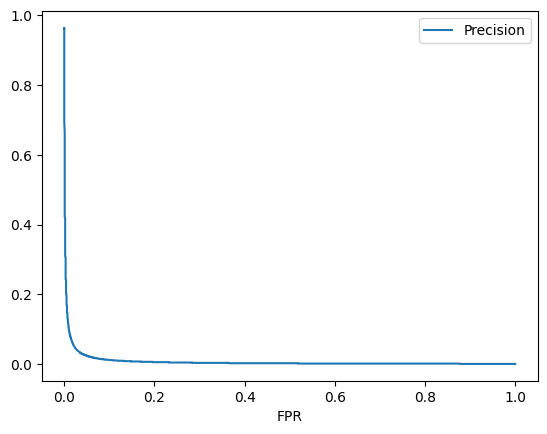

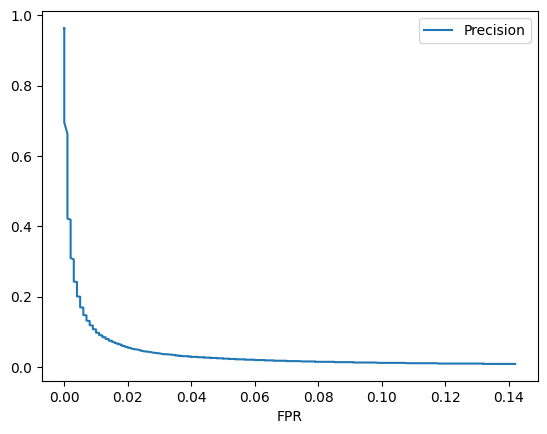

In [3]:
## в результате экспериментов сформирован файл Precision_FPR, содержащий пары значений Precision-FPR
import pandas as pd
from matplotlib import pyplot as plt

data=pd.read_csv('Precision_FPR.csv',delimiter=';')

#график в полном масштабе
data=data.iloc[:]
print(data.columns)
#график с FPR<=0.14
data.plot(y="Precision",x="FPR")
data=data.iloc[8000:]
print(data.columns)

data.plot(y="Precision",x="FPR")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

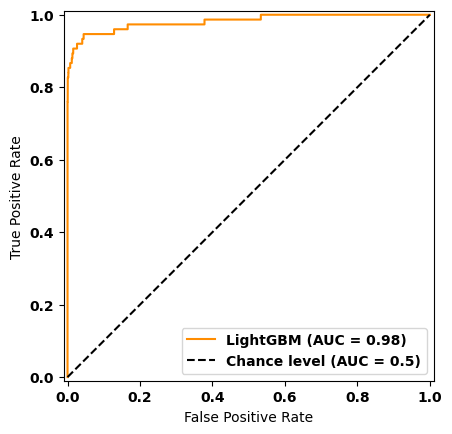

In [23]:
##ROC кривая
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    labels_test,
    predicts,
    name=f"LightGBM",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

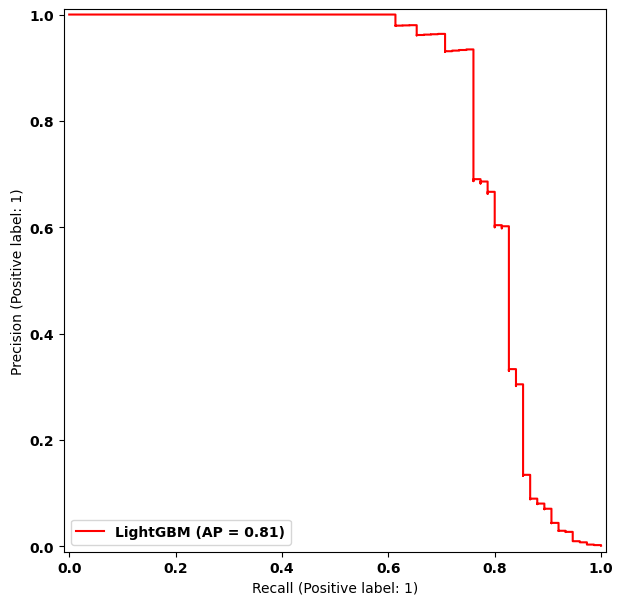

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

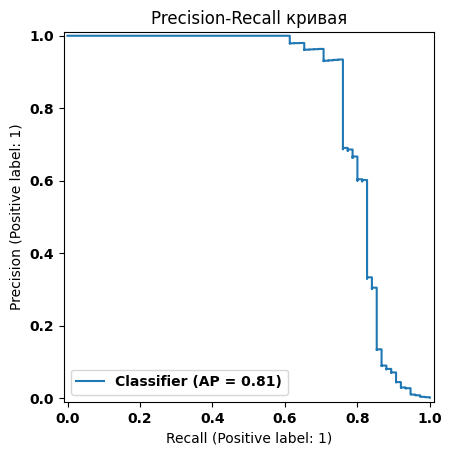

In [24]:
##Precision_recall кривая
from sklearn.metrics import PrecisionRecallDisplay
font = {
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay.from_predictions(labels_test, predicts)
_ = display.ax_.set_title("Precision-Recall кривая")
display.plot(ax=ax, name="LightGBM", color="red")